# Objetivo del Modelo

De acuerdo con el comportamiento de 24 meses de un portafolio de crédito, elaborar un modelo que nos ayude a precedir si los clientes a los que se les está aprobando un crédito actualmente terminarán resultando en una pérdida para la compañía de acuerdo con sus comportamientos de pago.


# Inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [2]:
database = pd.read_csv('~/Documents/GitHub/FinalProjectLCA/data/cleaned/totaldata.csv', delimiter=';')

In [3]:
database.head(5)

,account__id,customer_status_final,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,5d1bdad7-8431-4f8e-87dd-21147529d194,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5d38cfc2-1913-4623-b1e7-44bcb6867d96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5d39f1ef-625c-43b3-970e-bdb28ac37bce,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5d3a0d04-4170-45bd-9c43-e4401ce74279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5d3a0d84-faea-4d07-ad24-505ccb394e34,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


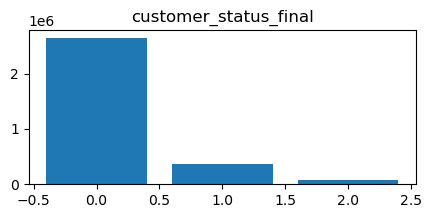

In [4]:
plt.figure(figsize=(5,2))
plt.bar(database['customer_status_final'].unique(),database['customer_status_final'].value_counts())
plt.title('customer_status_final')
plt.show()

Nuestra variable target será "customer_staus_final"

In [5]:
database.columns

Index(['account__id', 'customer_status_final', '2021-01-31', '2021-02-28',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-05-31', '2022-06-30',
       '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
       '2022-12-31'],
      dtype='object')

In [6]:
database.customer_status_final[database.customer_status_final == 2].count()

80140

In [7]:
database.customer_status_final[database.customer_status_final == 1].count()

364550

In [8]:
database.customer_status_final[database.customer_status_final == 0].count()

2649592

In [9]:
database.isna().sum()

account__id              0
customer_status_final    0
2021-01-31               0
2021-02-28               0
2021-03-31               0
2021-04-30               0
2021-05-31               0
2021-06-30               0
2021-07-31               0
2021-08-31               0
2021-09-30               0
2021-10-31               0
2021-11-30               0
2021-12-31               0
2022-01-31               0
2022-02-28               0
2022-03-31               0
2022-05-31               0
2022-06-30               0
2022-07-31               0
2022-08-31               0
2022-09-30               0
2022-10-31               0
2022-11-30               0
2022-12-31               0
dtype: int64

In [10]:
dbSample = database.head(500000)

In [11]:
db = dbSample.drop(['account__id'], axis = 1)

In [12]:
correl = db.corr()
correl

,customer_status_final,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
customer_status_final,1.000000,0.039865,0.040875,0.042422,0.052227,0.062881,0.074035,0.091422,0.116531,0.141733,...,0.224213,0.238753,0.292511,0.388588,0.593282,0.724300,0.802576,0.862043,0.886619,0.882420
2021-01-31,0.039865,1.000000,0.732218,0.356114,0.224343,0.127848,0.093130,0.082706,0.074145,0.056628,...,0.016116,0.016156,0.014284,0.013173,0.011494,0.012287,0.009888,0.010826,0.010526,0.009791
2021-02-28,0.040875,0.732218,1.000000,0.504919,0.317549,0.190269,0.126844,0.083275,0.070988,0.059057,...,0.023637,0.022457,0.015319,0.013677,0.010760,0.010674,0.010393,0.010822,0.010825,0.009200
2021-03-31,0.042422,0.356114,0.504919,1.000000,0.601949,0.338467,0.202178,0.105604,0.070150,0.064120,...,0.022414,0.021267,0.019054,0.014995,0.012876,0.014630,0.013601,0.013994,0.012804,0.011316
2021-04-30,0.052227,0.224343,0.317549,0.601949,1.000000,0.571208,0.346272,0.179034,0.122446,0.092160,...,0.039384,0.035592,0.032899,0.025046,0.020577,0.019747,0.018686,0.018914,0.017488,0.015028
2021-05-31,0.062881,0.127848,0.190269,0.338467,0.571208,1.000000,0.599005,0.326276,0.199808,0.133636,...,0.053766,0.049744,0.040180,0.031845,0.028045,0.027721,0.026347,0.025619,0.024009,0.020976
2021-06-30,0.074035,0.093130,0.126844,0.202178,0.346272,0.599005,1.000000,0.555636,0.344124,0.212982,...,0.065536,0.057869,0.046493,0.046460,0.039507,0.035702,0.032702,0.031720,0.030632,0.026627
2021-07-31,0.091422,0.082706,0.083275,0.105604,0.179034,0.326276,0.555636,1.000000,0.611935,0.380398,...,0.079346,0.074453,0.057634,0.053239,0.049858,0.043130,0.041495,0.039381,0.038282,0.034887
2021-08-31,0.116531,0.074145,0.070988,0.070150,0.122446,0.199808,0.344124,0.611935,1.000000,0.633281,...,0.097304,0.093432,0.071014,0.067170,0.064869,0.059285,0.056193,0.055099,0.053667,0.049705
2021-09-30,0.141733,0.056628,0.059057,0.064120,0.092160,0.133636,0.212982,0.380398,0.633281,1.000000,...,0.114558,0.106495,0.084344,0.080443,0.079069,0.074475,0.071866,0.070537,0.068578,0.064144


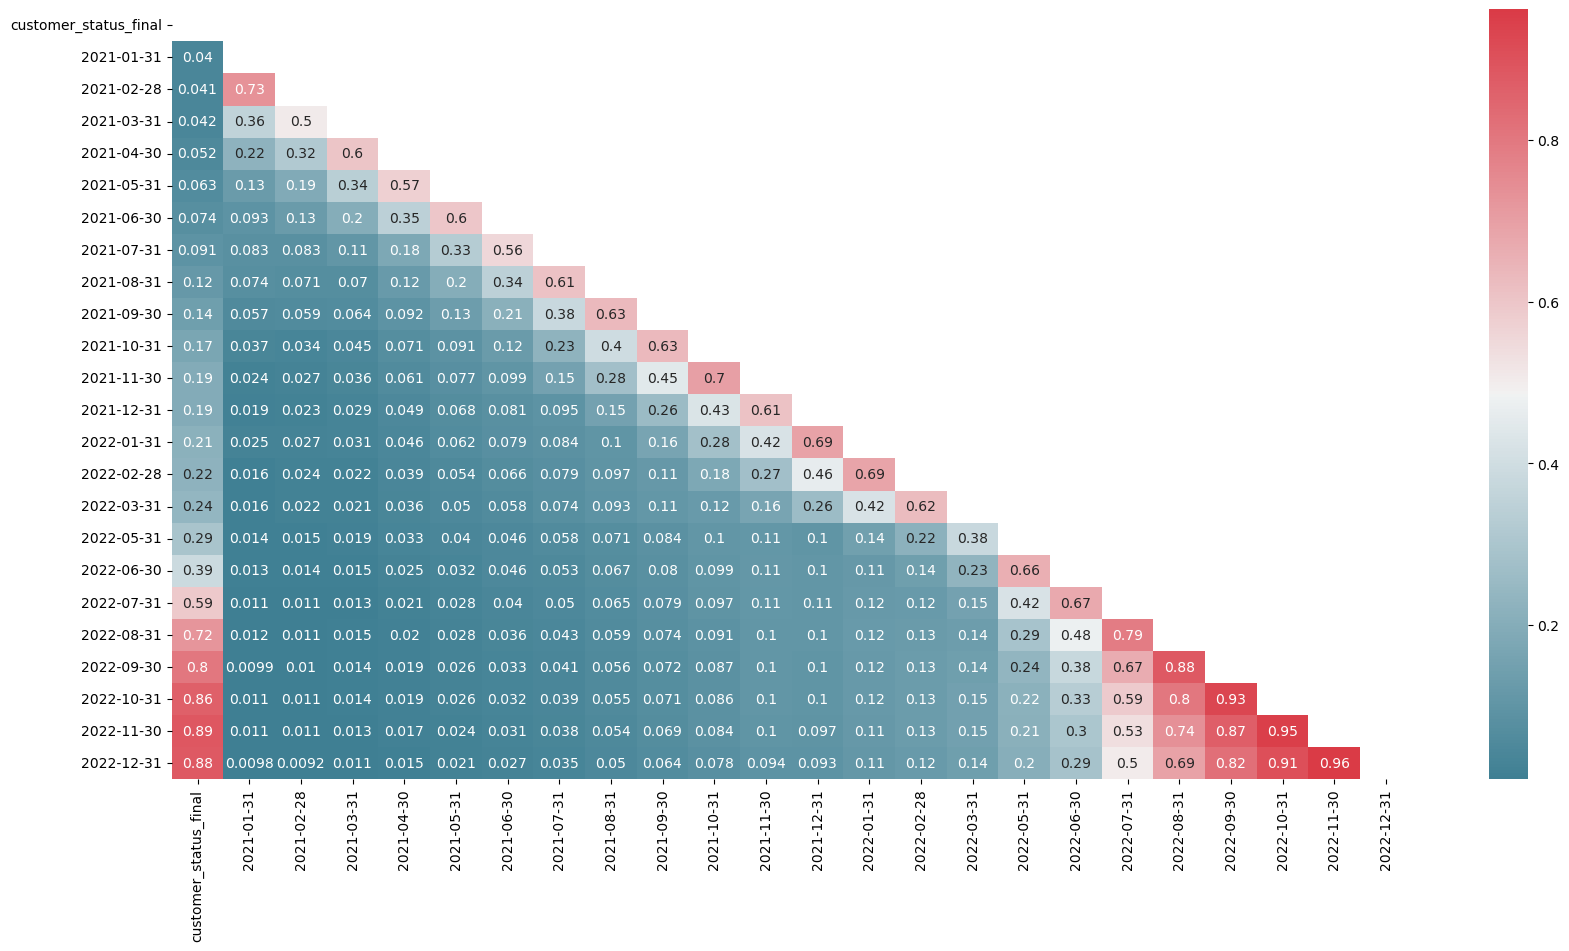

In [13]:
mask=np.triu(np.ones_like(correl, dtype=bool))

f, ax=plt.subplots(figsize=(20, 10))                 

cmap=sns.diverging_palette(220, 10, as_cmap=True)   

sns.heatmap(correl, mask=mask, cmap=cmap, annot=True)
plt.show()

In [14]:
x = db.drop(['customer_status_final'], axis = 1)
y = db['customer_status_final']

### KNN Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [16]:
x.shape, y.shape

((500000, 23), (500000,))

In [17]:
X_train.shape, X_test.shape

((375000, 23), (125000, 23))

In [18]:
y_train.shape, y_test.shape

((375000,), (125000,))

In [35]:
model = KNeighborsClassifier(n_neighbors=13) #Classifier
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [25]:
scores = []
for k in range(2,20):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train.values, y_train)
    score = model.score(X_test.values,y_test)
    scores.append(score)

In [26]:
scores

[0.998496,
 0.998832,
 0.998592,
 0.998808,
 0.998696,
 0.998848,
 0.998696,
 0.998816,
 0.99876,
 0.998872,
 0.998824,
 0.998896,
 0.998816,
 0.998824,
 0.998784,
 0.99876,
 0.998776,
 0.998824]

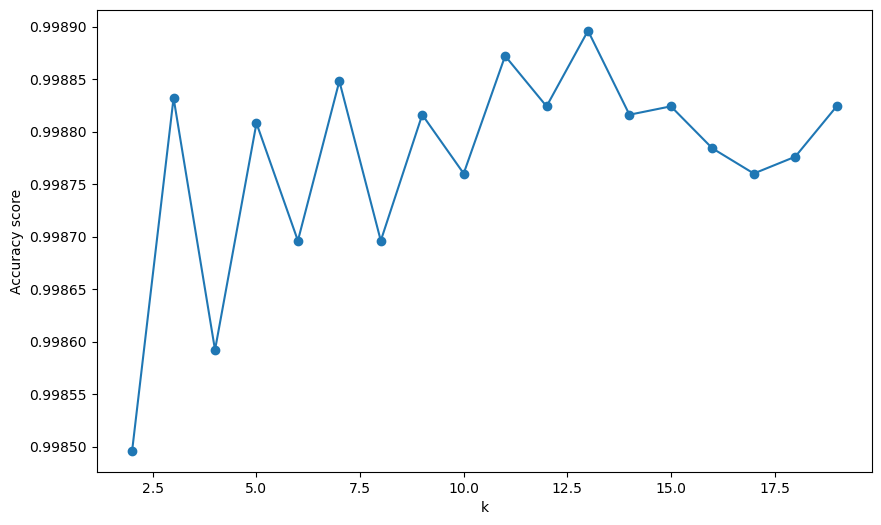

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

In [28]:
MSEs = []

for k in range(2,20):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train.values, y_train)
    preds = model.predict(X_test.values)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [29]:
MSEs

[0.001504,
 0.001168,
 0.001408,
 0.001192,
 0.001304,
 0.001152,
 0.001304,
 0.001184,
 0.00124,
 0.001128,
 0.001176,
 0.001104,
 0.001184,
 0.001176,
 0.001216,
 0.00124,
 0.001224,
 0.001176]

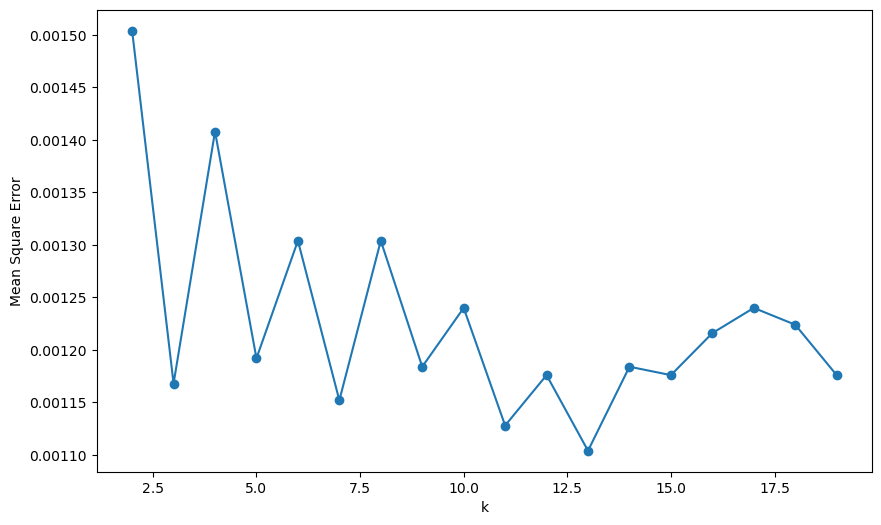

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

In [36]:
predictions_train = model.predict(X_train.values)
predictions_train

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [37]:
predictions_train.shape

(375000,)

In [38]:
score_train = model.score(X_train.values, y_train)
score_train

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9990373333333333

In [39]:
predictions_test = model.predict(X_test.values)
predictions_test

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 2, ..., 1, 0, 0])

In [40]:
score_test = model.score(X_test.values, y_test)
score_test

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.998896

#Evalaución de resultados

In [41]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(predictions_train, y_train)
cm

array([[317875,    125,      0],
       [    58,  47137,    118],
       [     0,     60,   9627]])

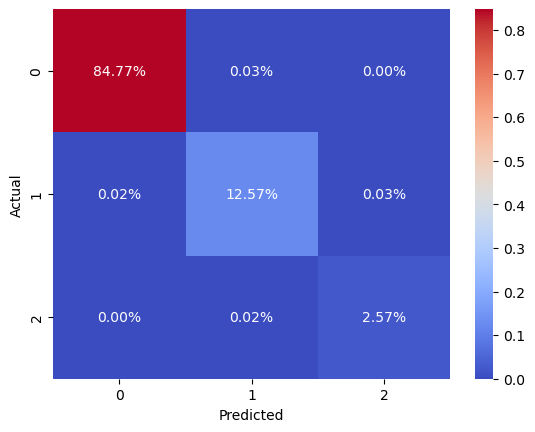

In [42]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
cm_test = confusion_matrix(predictions_test, y_test)
cm_test

array([[105980,     49,      0],
       [    20,  15601,     45],
       [     0,     24,   3281]])

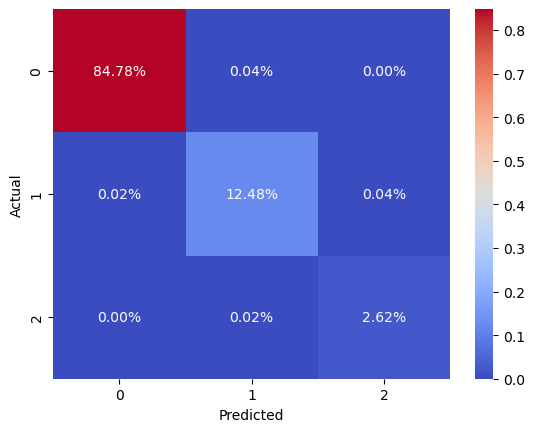

In [44]:
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()